<a href="https://colab.research.google.com/github/tofighi/MachineLearning/blob/master/knn_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data ="""
x,y,Color
-1,1,red
0,1,blue
0,2,red
1,-1,red
1,0,blue
1,2,blue
2,2,red
2,3,blue
"""

df = pd.read_csv(StringIO(data))
df

,x,y,Color
0,-1,1,red
1,0,1,blue
2,0,2,red
3,1,-1,red
4,1,0,blue
5,1,2,blue
6,2,2,red
7,2,3,blue


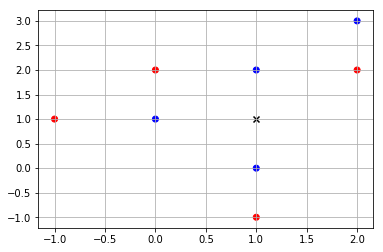

In [14]:
plt.scatter(df.x,df.y,c=df.Color)
plt.grid(True)
plt.scatter(1,1,c='black',marker='x')